In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank_marketing_updated_v1.csv')

In [3]:
print(df.head())

   customerid   age  salary  balance marital status job with education level.  \
0           1  58.0  100000     2143        married       management,tertiary   
1           2  44.0   60000       29         single      technician,secondary   
2           3  33.0  120000        2        married    entrepreneur,secondary   
3           4  47.0   20000     1506        married       blue-collar,unknown   
4           5  33.0       0        1         single           unknown,unknown   

  targeted default loans housing loan  contact  day      month duration  \
0      yes      no   yes           no  unknown    5  may, 2017  261 sec   
1      yes      no   yes           no  unknown    5  may, 2017  151 sec   
2      yes      no   yes          yes  unknown    5  may, 2017   76 sec   
3       no      no   yes           no  unknown    5  may, 2017   92 sec   
4       no      no    no           no  unknown    5  may, 2017  198 sec   

   campaign  pdays  previous poutcome response  
0         1  

In [4]:
print(df.tail())

       customerid   age  salary  balance marital status  \
45206       45207  51.0   60000      825        married   
45207       45208  71.0   55000     1729       divorced   
45208       45209  72.0   55000     5715        married   
45209       45210  57.0   20000      668        married   
45210       45211  37.0  120000     2971        married   

      job with education level. targeted default loans housing loan  \
45206       technician,tertiary      yes      no    no           no   
45207           retired,primary      yes      no    no           no   
45208         retired,secondary      yes      no    no           no   
45209     blue-collar,secondary      yes      no    no           no   
45210    entrepreneur,secondary      yes      no    no           no   

         contact  day      month              duration  campaign  pdays  \
45206   cellular   17  nov, 2017  16.2833333333333 min         3     -1   
45207   cellular   17  nov, 2017               7.6 min         2    

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 45211 non-null  int64  
 1   age                        45191 non-null  float64
 2   salary                     45211 non-null  int64  
 3   balance                    45211 non-null  int64  
 4   marital status             45211 non-null  object 
 5   job with education level.  45211 non-null  object 
 6   targeted                   45211 non-null  object 
 7   default                    45211 non-null  object 
 8   loans                      45211 non-null  object 
 9   housing loan               45211 non-null  object 
 10  contact                    45211 non-null  object 
 11  day                        45211 non-null  int64  
 12  month                      45161 non-null  object 
 13  duration                   45211 non-null  obj

In [6]:
# Split the 'duration' column into two new columns - 'time' and 'time_unit'
df[['time in seconds', 'time_unit']] = df['duration'].str.split(' ', expand=True)

# Convert the 'time' column to float
df['time in seconds'] = df['time in seconds'].astype(float)

# Convert all times that are in minutes to seconds
df.loc[df['time_unit'] == 'min', 'time in seconds'] = df['time in seconds'] * 60

# We will convert all the time unit in 'sec' for all rows
df['time_unit'] = 'sec'  

print(df)

       customerid   age  salary  balance marital status  \
0               1  58.0  100000     2143        married   
1               2  44.0   60000       29         single   
2               3  33.0  120000        2        married   
3               4  47.0   20000     1506        married   
4               5  33.0       0        1         single   
...           ...   ...     ...      ...            ...   
45206       45207  51.0   60000      825        married   
45207       45208  71.0   55000     1729       divorced   
45208       45209  72.0   55000     5715        married   
45209       45210  57.0   20000      668        married   
45210       45211  37.0  120000     2971        married   

      job with education level. targeted default loans housing loan  ... day  \
0           management,tertiary      yes      no   yes           no  ...   5   
1          technician,secondary      yes      no   yes           no  ...   5   
2        entrepreneur,secondary      yes      no   

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 45211 non-null  int64  
 1   age                        45191 non-null  float64
 2   salary                     45211 non-null  int64  
 3   balance                    45211 non-null  int64  
 4   marital status             45211 non-null  object 
 5   job with education level.  45211 non-null  object 
 6   targeted                   45211 non-null  object 
 7   default                    45211 non-null  object 
 8   loans                      45211 non-null  object 
 9   housing loan               45211 non-null  object 
 10  contact                    45211 non-null  object 
 11  day                        45211 non-null  int64  
 12  month                      45161 non-null  object 
 13  duration                   45211 non-null  obj

In [8]:
print(df.describe())

         customerid           age         salary        balance           day  \
count  45211.000000  45191.000000   45211.000000   45211.000000  45211.000000   
mean   22606.000000     40.935651   57006.171065    1362.272058     15.806419   
std    13051.435847     10.619198   32085.718415    3044.765829      8.322476   
min        1.000000     18.000000       0.000000   -8019.000000      1.000000   
25%    11303.500000     33.000000   20000.000000      72.000000      8.000000   
50%    22606.000000     39.000000   60000.000000     448.000000     16.000000   
75%    33908.500000     48.000000   70000.000000    1428.000000     21.000000   
max    45211.000000     95.000000  120000.000000  102127.000000     31.000000   

           campaign         pdays      previous  time in seconds  
count  45211.000000  45211.000000  45211.000000     45211.000000  
mean       2.763841     40.197828      0.580323       258.163080  
std        3.098021    100.128746      2.303441       257.527812  
mi

In [9]:
print(df.isnull().sum())

customerid                    0
age                          20
salary                        0
balance                       0
marital status                0
job with education level.     0
targeted                      0
default                       0
loans                         0
housing loan                  0
contact                       0
day                           0
month                        50
duration                      0
campaign                      0
pdays                         0
previous                      0
poutcome                      0
response                     30
time in seconds               0
time_unit                     0
dtype: int64


In [10]:
print(df.duplicated().sum())

0


In [11]:
print(df.head())

   customerid   age  salary  balance marital status job with education level.  \
0           1  58.0  100000     2143        married       management,tertiary   
1           2  44.0   60000       29         single      technician,secondary   
2           3  33.0  120000        2        married    entrepreneur,secondary   
3           4  47.0   20000     1506        married       blue-collar,unknown   
4           5  33.0       0        1         single           unknown,unknown   

  targeted default loans housing loan  ... day      month duration campaign  \
0      yes      no   yes           no  ...   5  may, 2017  261 sec        1   
1      yes      no   yes           no  ...   5  may, 2017  151 sec        1   
2      yes      no   yes          yes  ...   5  may, 2017   76 sec        1   
3       no      no   yes           no  ...   5  may, 2017   92 sec        1   
4       no      no    no           no  ...   5  may, 2017  198 sec        1   

   pdays  previous  poutcome response 

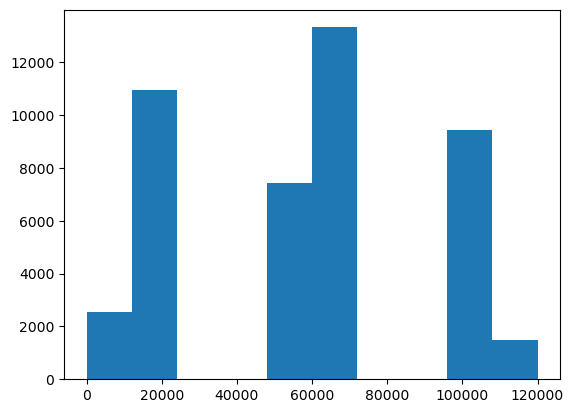

In [12]:
plt.hist(df['salary'])
plt.show()

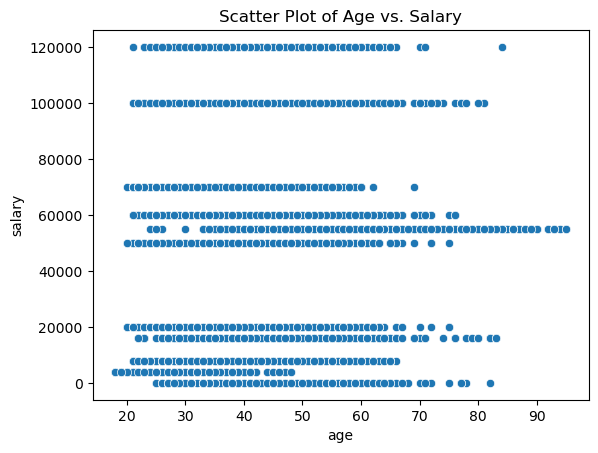

In [13]:
data = pd.read_csv("bank_marketing_updated_v1.csv")
sns.scatterplot(x='age', y='salary', data=data)
plt.title("Scatter Plot of Age vs. Salary")
plt.show()

In [14]:
#2. Descriptive Statistics
#a. Derive summary statistics (mean, median, standard deviation) for relevant columns.

numerical_cols = ['customerid','age','salary', 'balance', 'campaign', 'day','pdays', 'duration', 'previous','time in seconds']
summary_stats = df[numerical_cols].describe()
print(summary_stats)

         customerid           age         salary        balance      campaign  \
count  45211.000000  45191.000000   45211.000000   45211.000000  45211.000000   
mean   22606.000000     40.935651   57006.171065    1362.272058      2.763841   
std    13051.435847     10.619198   32085.718415    3044.765829      3.098021   
min        1.000000     18.000000       0.000000   -8019.000000      1.000000   
25%    11303.500000     33.000000   20000.000000      72.000000      1.000000   
50%    22606.000000     39.000000   60000.000000     448.000000      2.000000   
75%    33908.500000     48.000000   70000.000000    1428.000000      3.000000   
max    45211.000000     95.000000  120000.000000  102127.000000     63.000000   

                day         pdays      previous  time in seconds  
count  45211.000000  45211.000000  45211.000000     45211.000000  
mean      15.806419     40.197828      0.580323       258.163080  
std        8.322476    100.128746      2.303441       257.527812  
mi

Response Distribution:
 response
no     39894
yes     5287
Name: count, dtype: int64


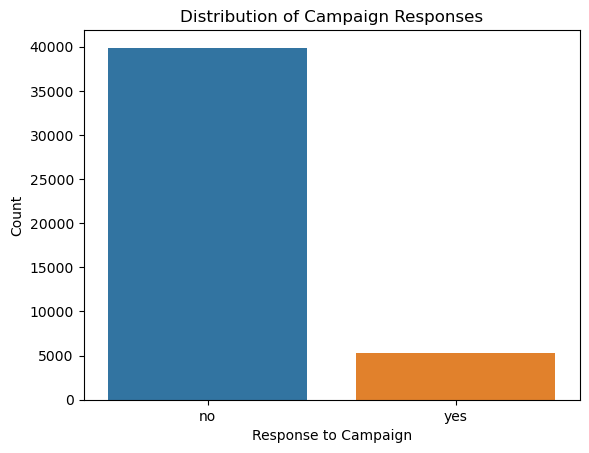

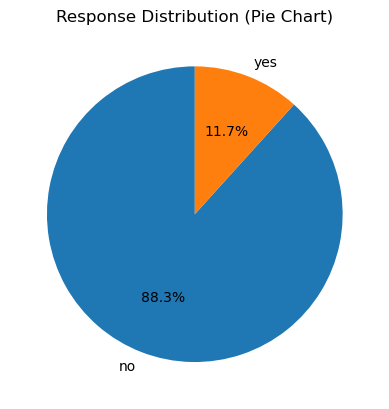

In [15]:
#b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.

target_dist = df['response'].value_counts()

# Display the count of each category in 'response'
print("Response Distribution:\n", target_dist)

# distribution of the response variable using a bar plot
sns.countplot(x='response', data=df)
plt.title('Distribution of Campaign Responses')
plt.xlabel('Response to Campaign')
plt.ylabel('Count')
plt.show()

# distribution of the response variable using a pie chart
target_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Response Distribution (Pie Chart)')
plt.ylabel('')  # to hide the y-label
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15644\355723624.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='purple')
C:\Users\hp\AppData\Local\Temp\ipykernel_15644\355723624.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='purple')
C:\Users\hp\AppData\Local\Temp\ipykernel_15644\355723624.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True, color='purple')


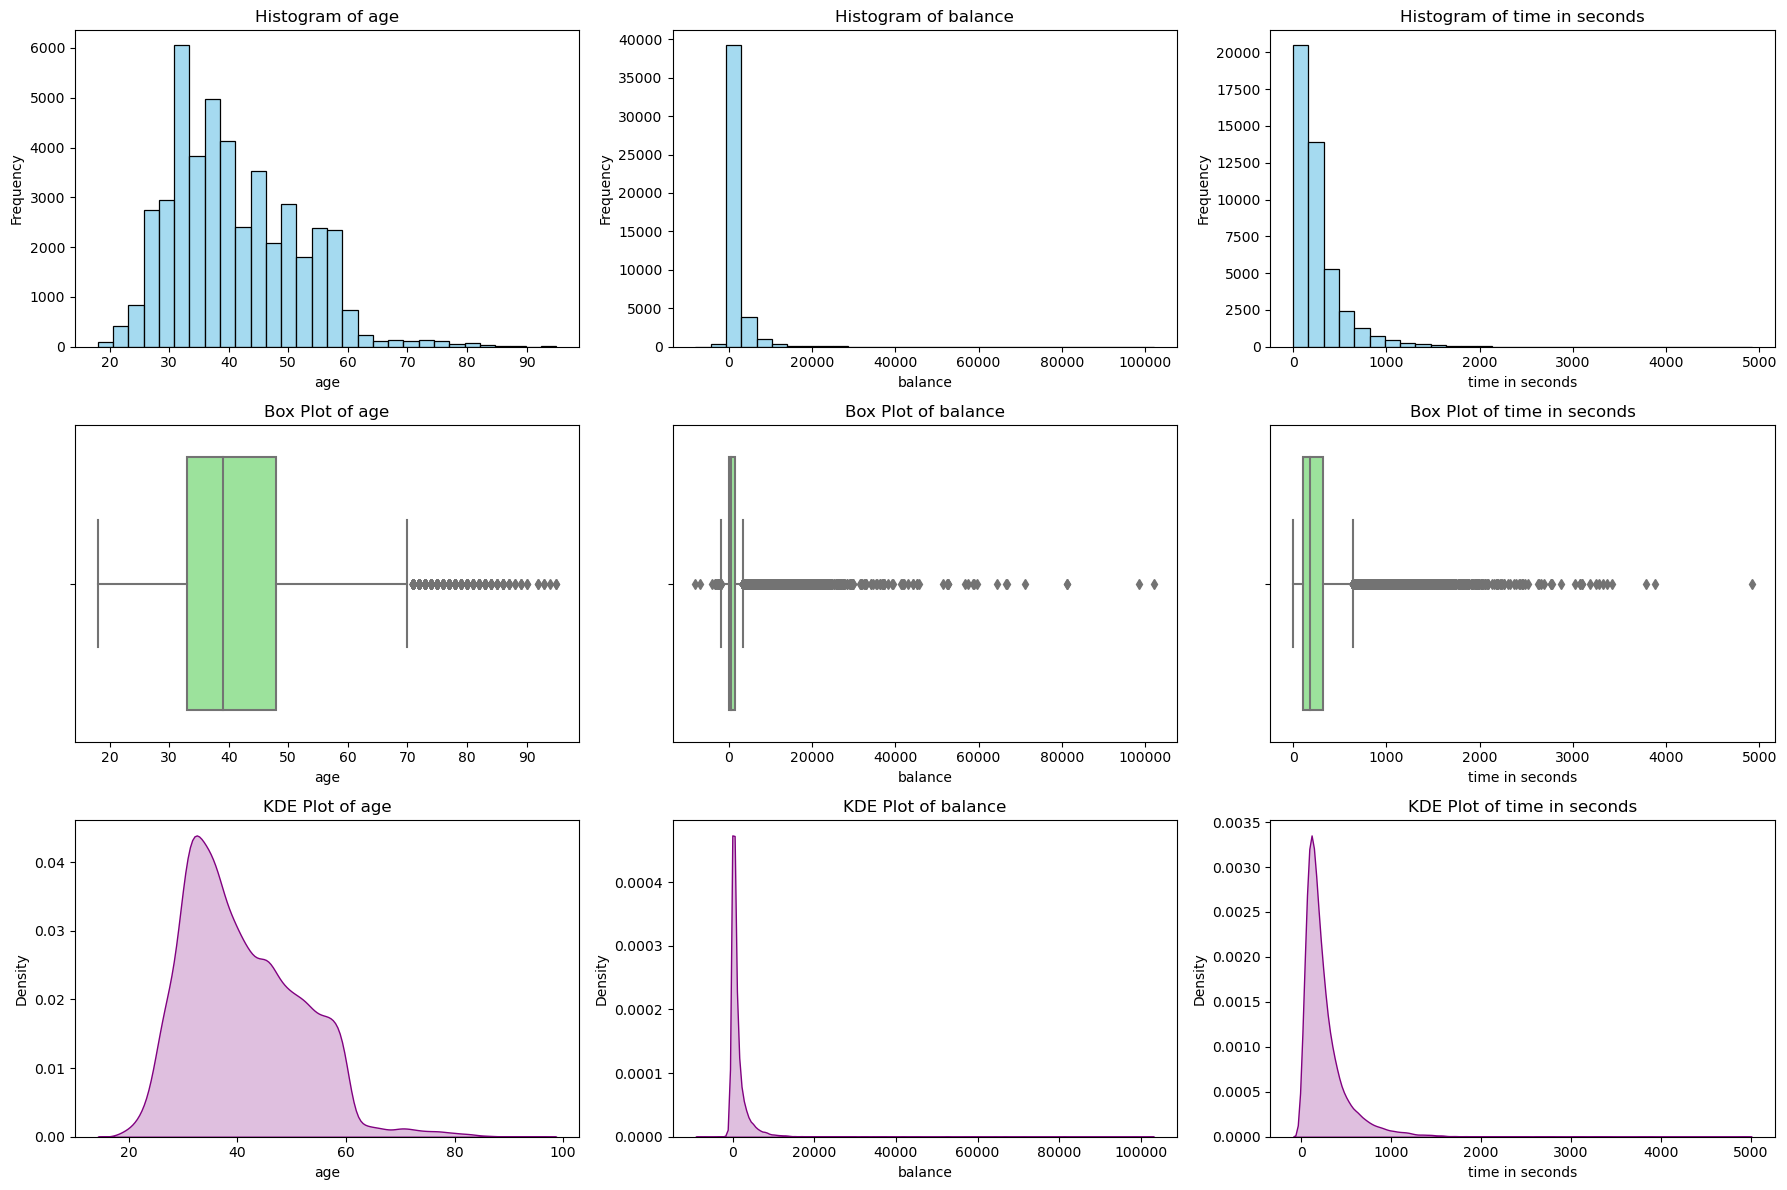

In [16]:
#3. Univariate Analysis
#a. Examine the distribution of individual key features, such as age, balance, and call duration.
#b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

key_features = ['age', 'balance', 'time in seconds']

# Set up the plot size for multiple subplots
plt.figure(figsize=(18, 12))

# Univariate analysis for each feature
for i, feature in enumerate(key_features, 1):
    # Create subplots for histogram, box plot, and KDE plot
    plt.subplot(3, len(key_features), i)  # Histogram
    sns.histplot(df[feature], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
   
    plt.subplot(3, len(key_features), len(key_features) + i)  # Box Plot
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
   
    plt.subplot(3, len(key_features), 2*len(key_features) + i)  # KDE Plot
    sns.kdeplot(df[feature], shade=True, color='purple')
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Adjust the layout for better readability
plt.tight_layout()
plt.show()




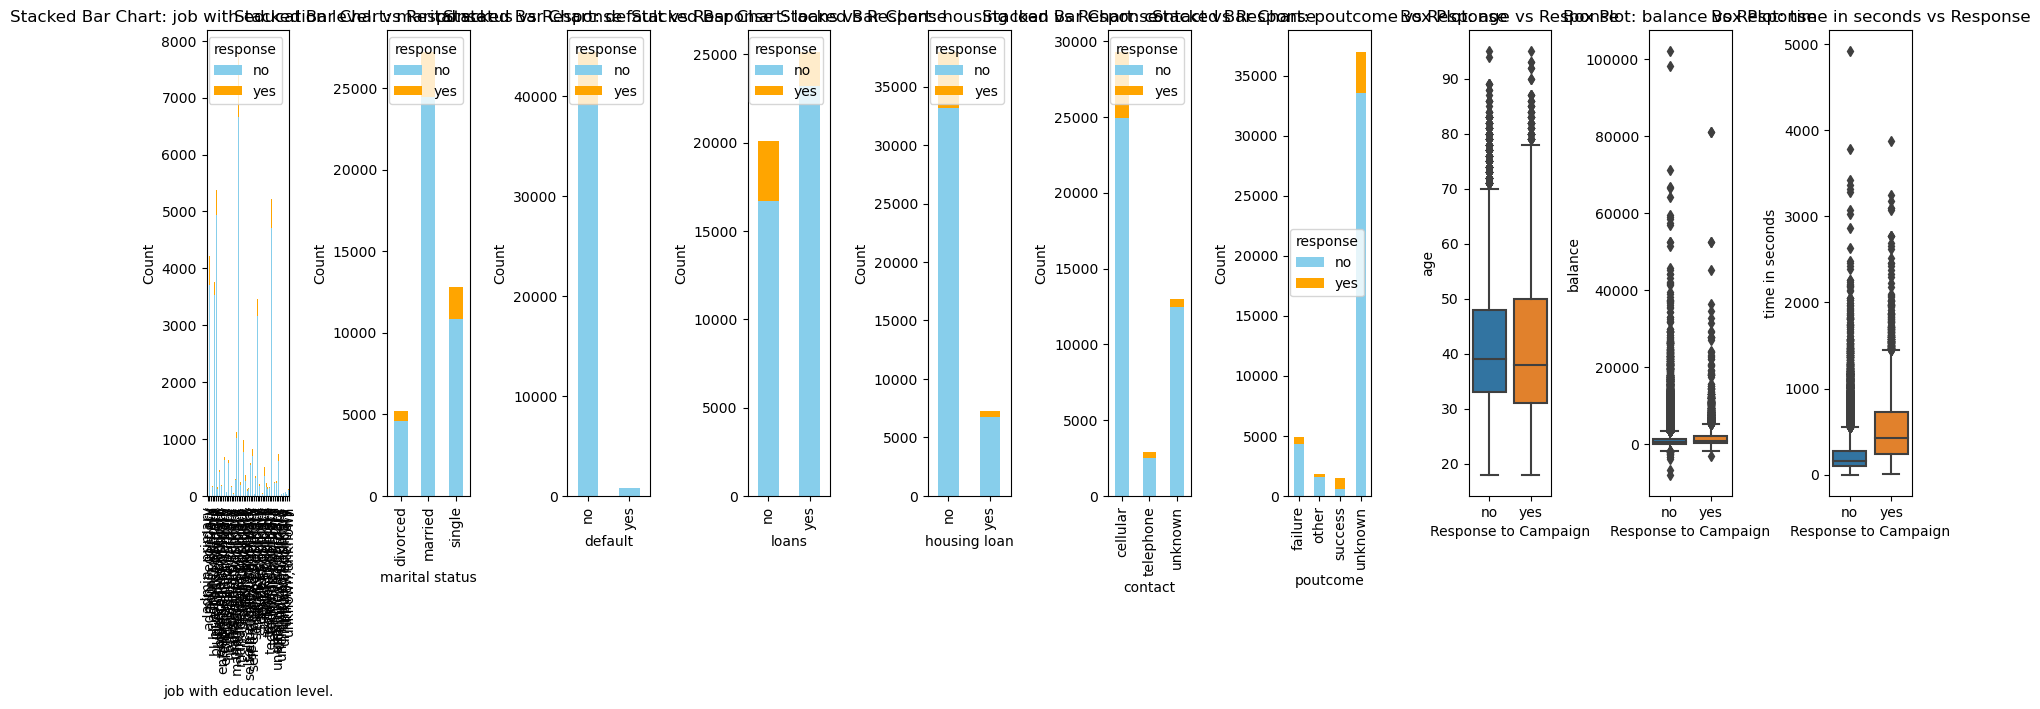

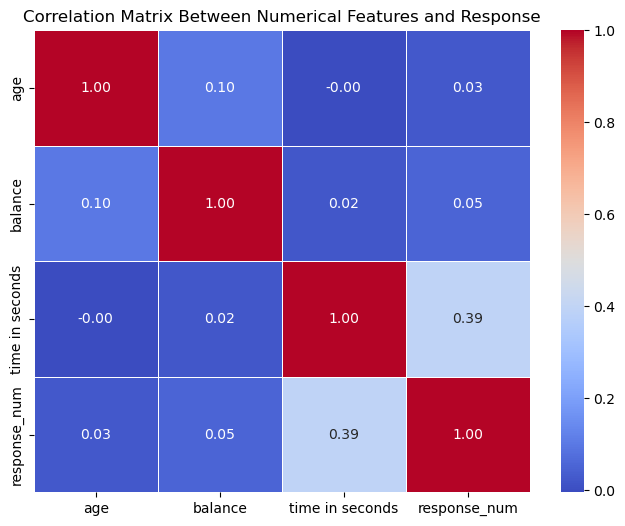

In [17]:
#4. Bivariate Analysis
#a. Evaluate the relationship between independent variables and the target variable.
#b. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.


# Strip out any spaces in column names
df.columns = df.columns.str.strip()

# Define categorical and numerical columns
categorical_columns = ['job with education level.', 'marital status', 'default', 'loans', 'housing loan', 'contact', 'poutcome']
numerical_columns = ['age', 'balance', 'time in seconds']

num_categorical_plots = len(categorical_columns)
num_numerical_plots = len(numerical_columns)

# Set up the figure size for the subplots
plt.figure(figsize=(18, 12))

# We use 2 rows and a number of columns equal to the total of categorical and numerical variables
total_columns = num_categorical_plots + num_numerical_plots
num_rows = 2  # 1 row for categorical plot and 2nd row for numerical plots

# Relationship between categorical variables and the target variable using stacked bar charts
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, total_columns, i)
    
    # Create a stacked bar chart to show the distribution of responses ('yes' vs 'no')
    pd.crosstab(df[feature], df['response']).plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=plt.gca())
    plt.title(f'Stacked Bar Chart: {feature} vs Response')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Relationship between numerical variables and the target variable using box plots
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, total_columns, num_categorical_plots + i)
    
    # Create a box plot to show the distribution of numerical features against response
    sns.boxplot(x='response', y=feature, data=df)
    plt.title(f'Box Plot: {feature} vs Response')
    plt.xlabel('Response to Campaign')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# using a heatmap analyzing the correlation between numerical variables and the target variable 
# encoding 'response' to numerical values like yes = 1, no = 0
df['response_num'] = df['response'].map({'yes': 1, 'no': 0})

correlation_matrix = df[numerical_columns + ['response_num']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Numerical Features and Response')
plt.show()

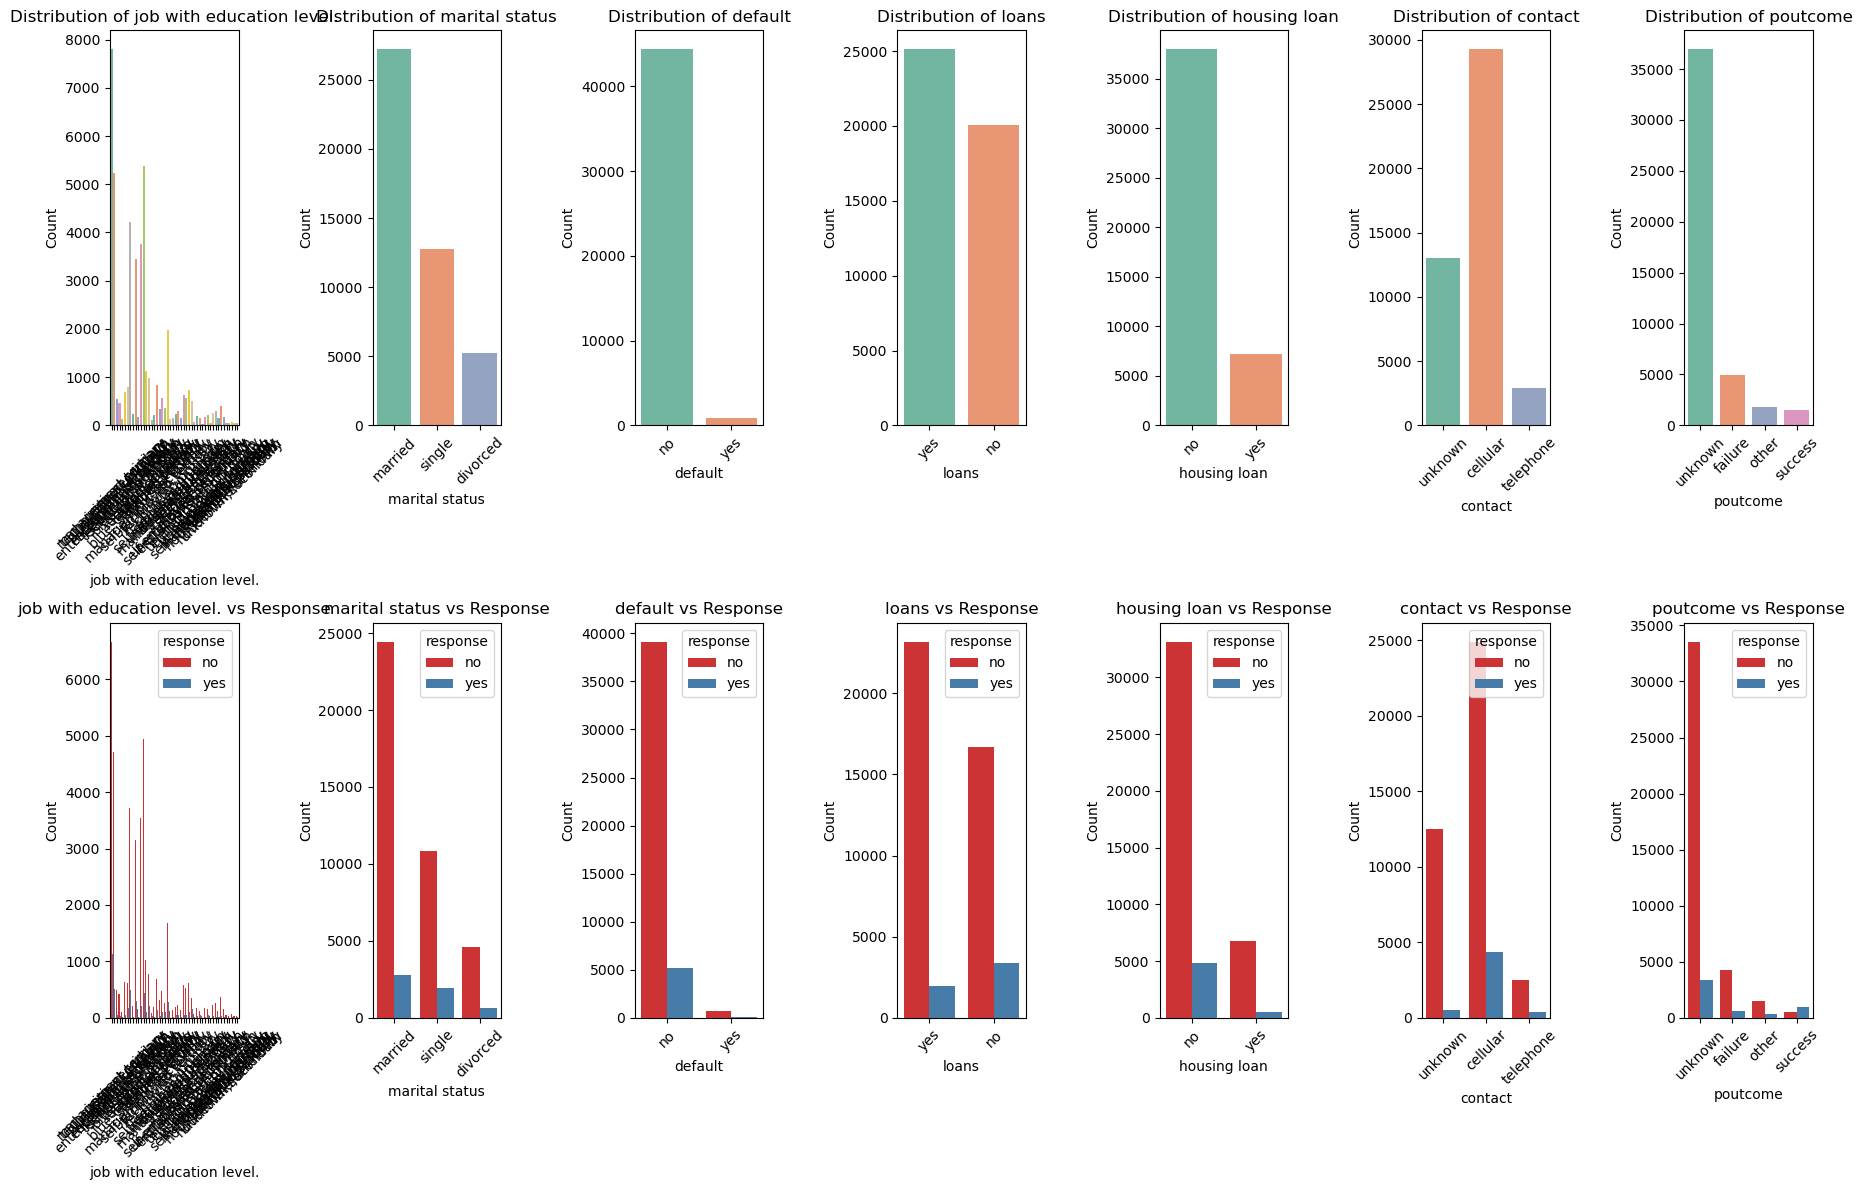

In [18]:
#5. Categorical Variables Analysis
#a. Investigate the distribution of categorical variables such as job type, education, and marital status.

# Strip out any spaces in column names
df.columns = df.columns.str.strip()

# Categorical columns for analysis
categorical_columns = ['job with education level.', 'marital status', 'default', 'loans', 'housing loan', 'contact', 'poutcome']

# Set up the plot size
plt.figure(figsize=(18, 12))

# a. Investigate the distribution of categorical variables
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(2, len(categorical_columns), i)
    # Plot the distribution of each categorical variable
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# b. Assess the impact of categorical variables on the campaign's success (using bar charts)
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(2, len(categorical_columns), len(categorical_columns) + i)
    # Plot the impact of each categorical variable on the 'response' (campaign success)
    sns.countplot(x=feature, hue='response', data=df, palette='Set1')
    plt.title(f'{feature} vs Response')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust the layout for better readability
plt.tight_layout()
plt.show()

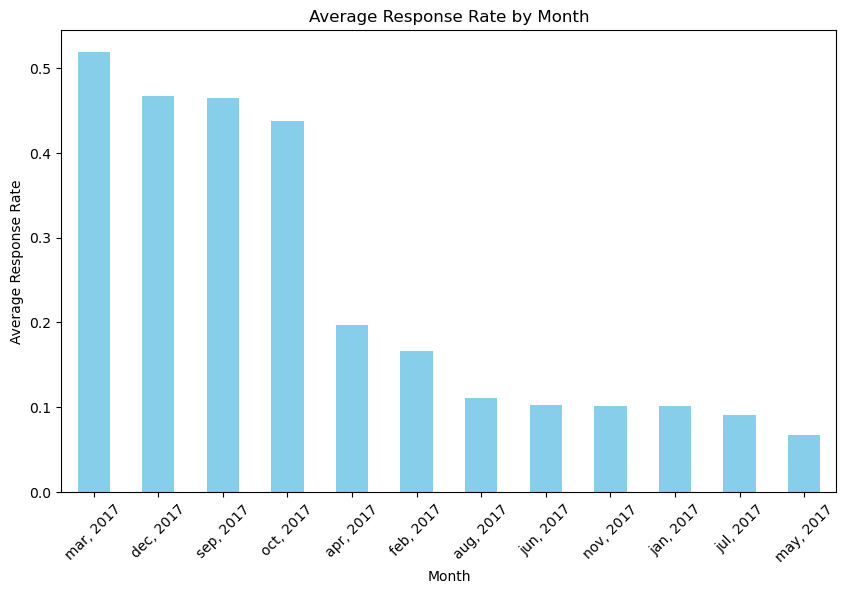

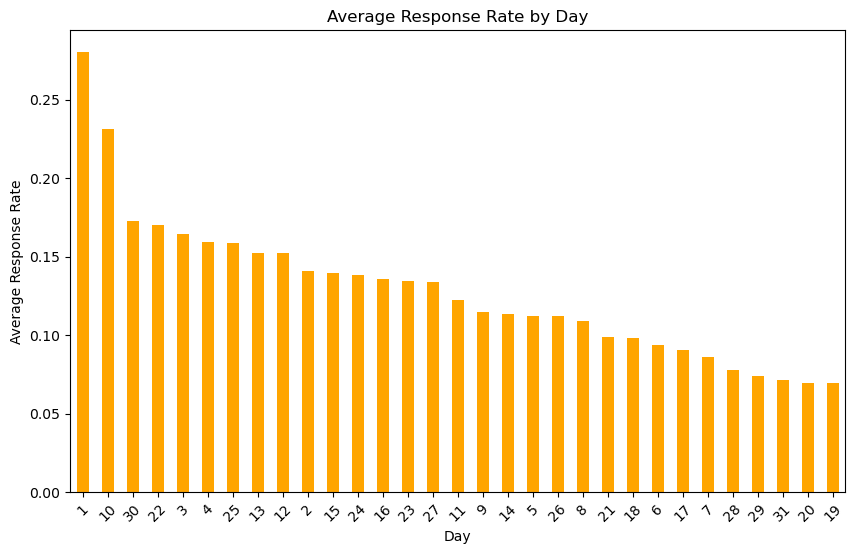

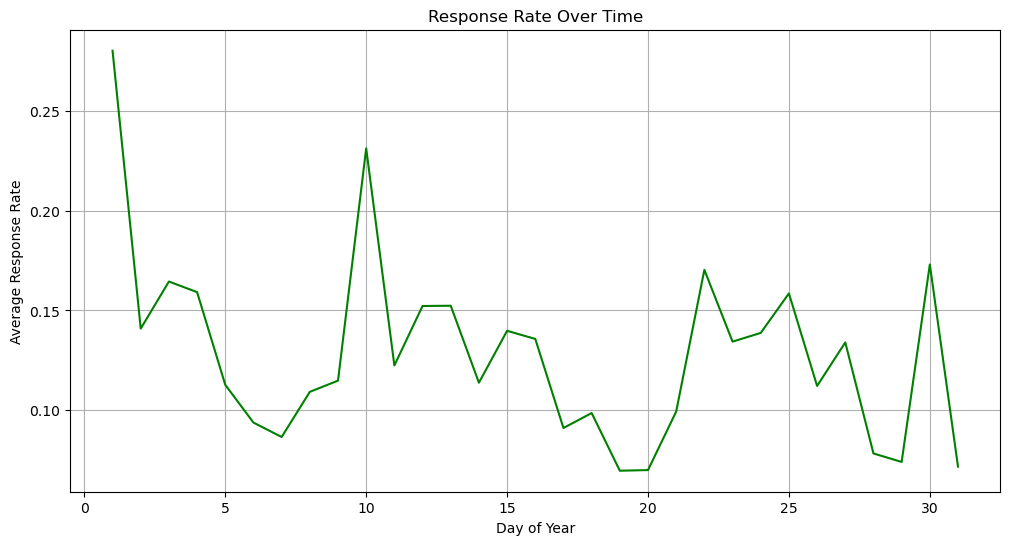

In [19]:
#6. Temporal Analysis
#a. Investigate temporal patterns in the success of the campaign over time.
#b. Analyze if specific months or days exhibit superior campaign performance.


df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')

# Grouping the data by 'month' and calculating the average response rate
monthly_performance = df.groupby('month')['response_num'].mean().sort_values(ascending=False)

# Plotting the monthly success rate
plt.figure(figsize=(10, 6))
monthly_performance.plot(kind='bar', color='skyblue')
plt.title('Average Response Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Response Rate')
plt.xticks(rotation=45)
plt.show()

#b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.
# calculating the average response rate on daily basis
daily_performance = df.groupby('day')['response_num'].mean().sort_values(ascending=False)

# Plotting the daily success rate
plt.figure(figsize=(10, 6))
daily_performance.plot(kind='bar', color='orange')
plt.title('Average Response Rate by Day')
plt.xlabel('Day')
plt.ylabel('Average Response Rate')
plt.xticks(rotation=45)
plt.show()

# a line plot for daily response rate
df['day_num'] = pd.to_datetime(df['day'], format='%d').dt.dayofyear  # Convert day into a day-of-year format if necessary

# Grouping by day and plotting response rate over time
daily_response_rate = df.groupby('day_num')['response_num'].mean()

plt.figure(figsize=(12, 6))
daily_response_rate.plot(kind='line', color='green')
plt.title('Response Rate Over Time')
plt.xlabel('Day of Year')
plt.ylabel('Average Response Rate')
plt.grid(True)
plt.show()

In [20]:
#7. Feature Engineering
#a. Introduce new features that may enhance prediction, such as creating age groups or income categories.
#b. Apply encoding techniques to transform categorical variables if necessary.

# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Create Age Groups (18-30, 31-40, 41-50, 51-60, 60+)
bins = [18, 30, 40, 50, 60, float('inf')]
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create Income Categories based on salary
salary_bins = [0, 30000, 60000, 90000, float('inf')]
salary_labels = ['Low', 'Medium', 'High', 'Very High']
df['salary_category'] = pd.cut(df['salary'], bins=salary_bins, labels=salary_labels, right=False)

# Encoding categorical features using Label Encoding or One-Hot Encoding
categorical_columns = ['job with education level.', 'marital status', 'default', 'loans', 'housing loan', 'contact', 'poutcome', 'response']
label_encoder = LabelEncoder()  # Initialize LabelEncoder

# Apply label encoding to binary categorical variables (e.g., 'default', 'loans', 'housing loan', 'response')
for col in ['default', 'loans', 'housing loan', 'response']:
    df[col] = label_encoder.fit_transform(df[col])

# For multi-category variables (e.g., 'job with education level.', 'marital status', 'contact', 'poutcome')
df = pd.get_dummies(df, columns=['job with education level.', 'marital status', 'contact', 'poutcome'], drop_first=True)

# Create Balance to Salary Ratio (financial health feature)
df['balance_to_salary_ratio'] = df['balance'] / df['salary']
df['balance_to_salary_ratio'].replace([float('inf'), -float('inf')], 0, inplace=True)  # handle any division by zero or infinity

# Create Interaction Features (e.g., age * salary)
df['age_salary_interaction'] = df['age'] * df['salary']

# Create Duration Category based on 'time in seconds' feature
duration_bins = [0, 5, 15, 30, float('inf')]
duration_labels = ['Short', 'Medium', 'Long', 'Very Long']
df['duration_category'] = pd.cut(df['time in seconds'], bins=duration_bins, labels=duration_labels, right=False)

# Display the new features to verify
new_features = ['age_group', 'salary_category', 'balance_to_salary_ratio', 'age_salary_interaction', 'duration_category']
df[new_features].head()

,age_group,salary_category,balance_to_salary_ratio,age_salary_interaction,duration_category
0,51-60,Very High,0.021430,5800000.0,Very Long
1,41-50,High,0.000483,2640000.0,Very Long
2,31-40,Very High,0.000017,3960000.0,Very Long
3,41-50,Low,0.075300,940000.0,Very Long
4,31-40,Low,0.000000,0.0,Very Long


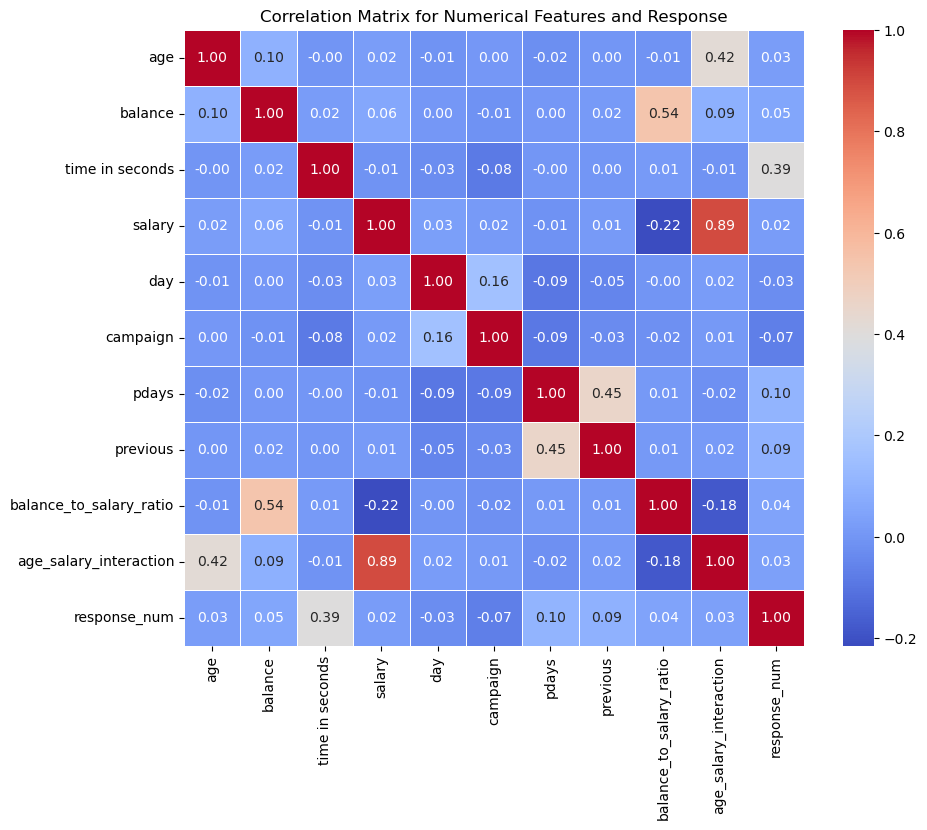

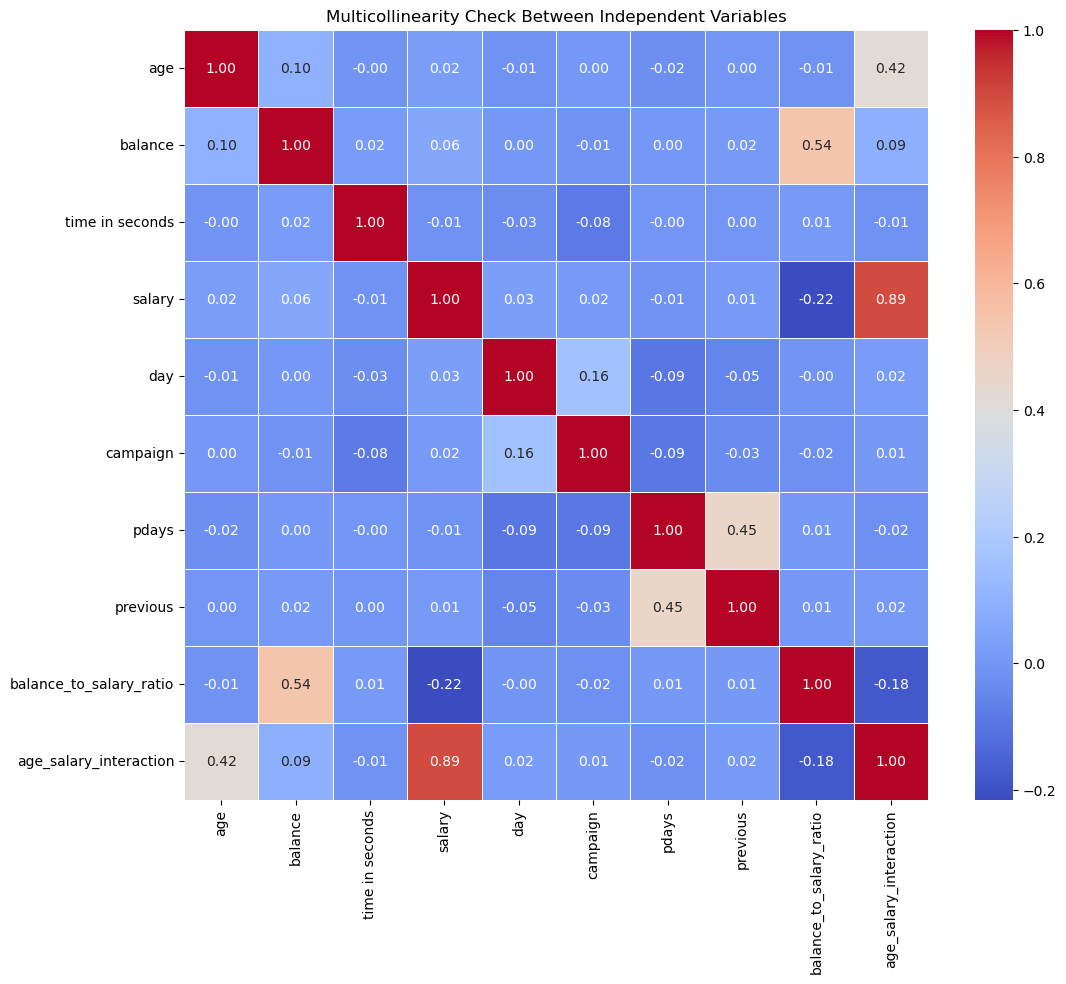

In [22]:
#8. Correlation Analysis
#a. Examine correlations between independent variables to identify multicollinearity.
#b. Evaluate how correlated features may influence the target variable.

numerical_columns = ['age', 'balance', 'time in seconds', 'salary', 'day', 'campaign', 'pdays', 'previous', 'balance_to_salary_ratio', 'age_salary_interaction']
correlation_matrix = df[numerical_columns + ['response_num']].corr()

# 2. Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features and Response')
plt.show()

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Multicollinearity Check Between Independent Variables')
plt.show()

# Based on the correlation matrix, look for features that have high correlation values above 0.8 or below -0.8

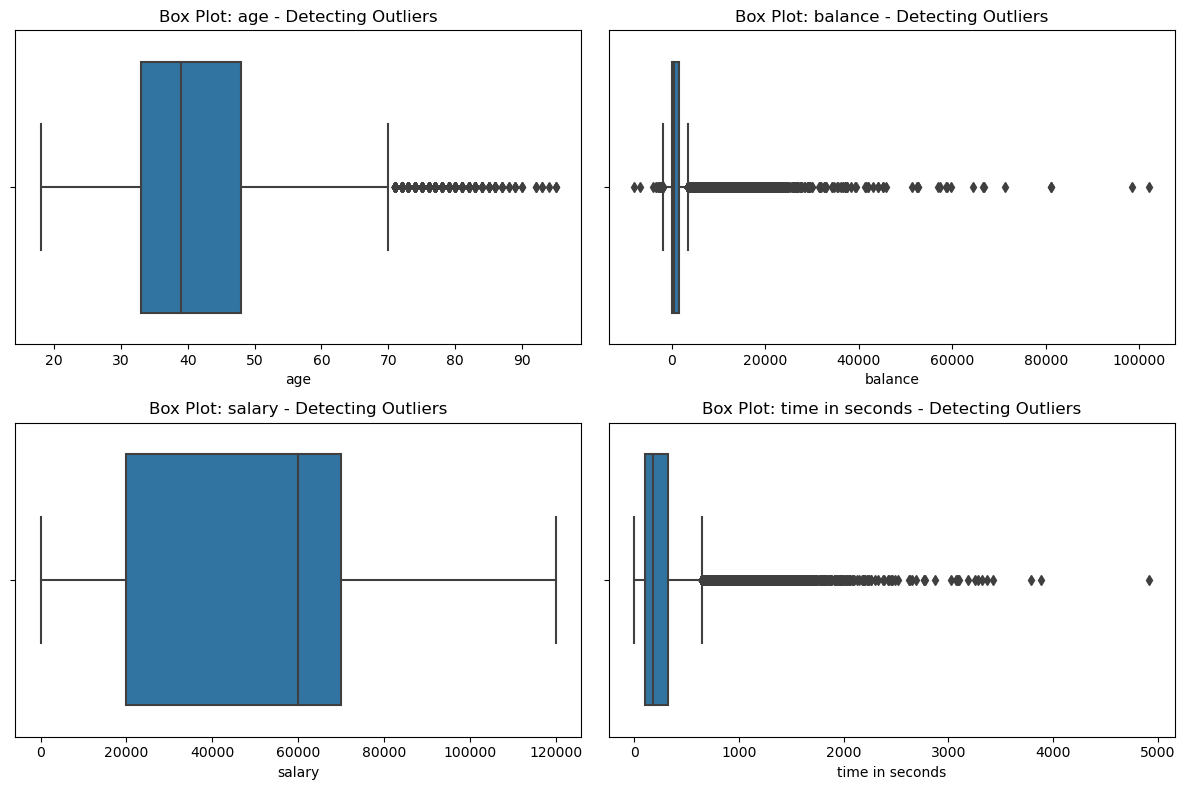

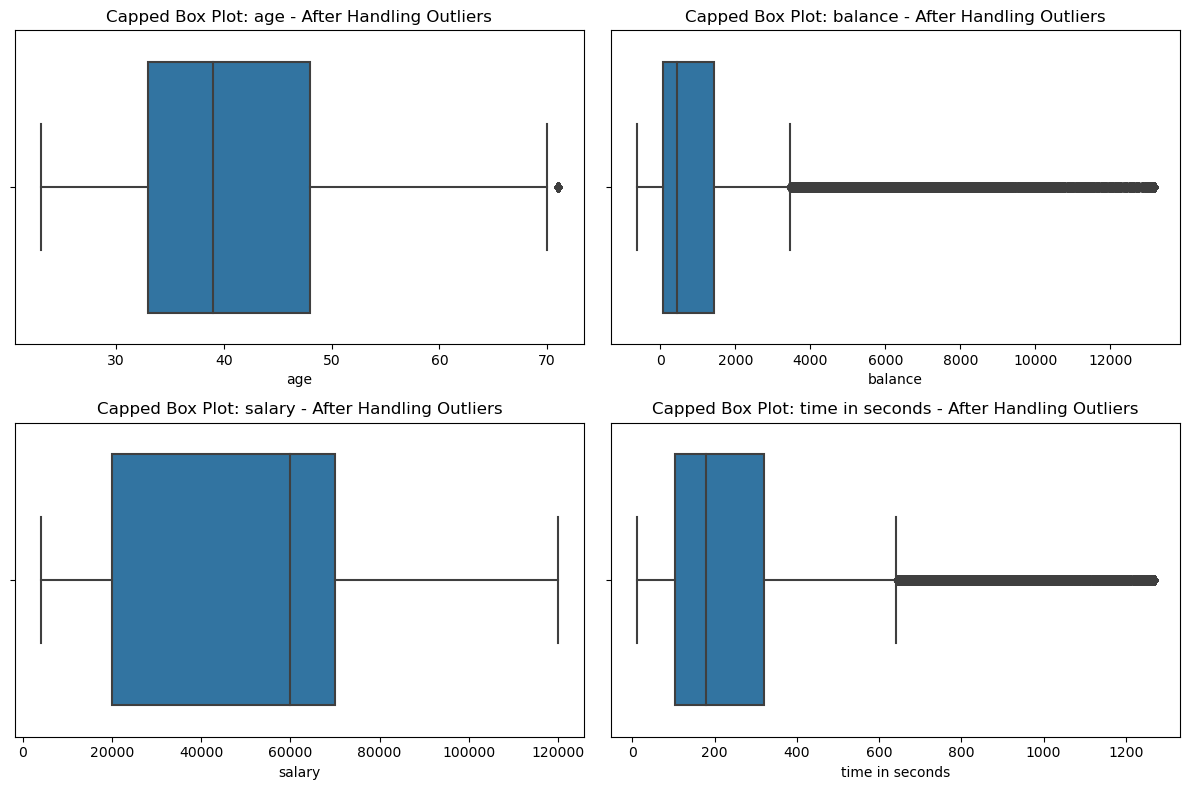

In [24]:
#9. Outlier Detection and Handling
#a. Identify and rectify outliers that could impact the analysis and predictions.


# Boxplots to detect outliers for numerical variables
numerical_columns_outliers = ['age', 'balance', 'salary', 'time in seconds']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_columns_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot: {feature} - Detecting Outliers')

plt.tight_layout()
plt.show()

# Handling Outliers
for feature in numerical_columns_outliers:
    lower_percentile = df[feature].quantile(0.01)
    upper_percentile = df[feature].quantile(0.99)
    df[feature] = df[feature].clip(lower=lower_percentile, upper=upper_percentile)

# After handling outliers, you can recheck the boxplots to verify outliers are handled appropriately.
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_columns_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Capped Box Plot: {feature} - After Handling Outliers')

plt.tight_layout()
plt.show()